# PROJECT :  Student Performance Analysis and Model Building using Multiple Linear Regression

Importing libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Loading Dataset

In [5]:
df=pd.read_csv("StudentsPerformance.csv")

# Explanatory Data Analysis

Shape of Dataset

In [343]:
df.shape

(1000, 8)

In [344]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Columns of Dataset

In [345]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Checking Missing Values

In [346]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [347]:
df.describe().T  #T means transpose

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Mean Score of all 3 subjects

In [9]:
df['mean_score']=((df['math score']+df['reading score']+df['writing score'])/3).round()

Encoding categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['test preparation course']=le.fit_transform(df['test preparation course'])
df['gender']=le.fit_transform(df['gender'])
df['lunch']=le.fit_transform(df['lunch'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


In [351]:
df['gender'].value_counts() #female->0, male->1

gender
0    518
1    482
Name: count, dtype: int64

Number of Female students=518
Number of Male students=484

In [352]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


In [353]:
df['race/ethnicity'].value_counts() #Group A->0,Group B->1 ,Group C->2 ,Group D->3,Group E->4 

race/ethnicity
2    319
3    262
1    190
4    140
0     89
Name: count, dtype: int64

Group Wise Count:  Group A=89, Group B=190, Group C=319, Group D=262, Group E=140

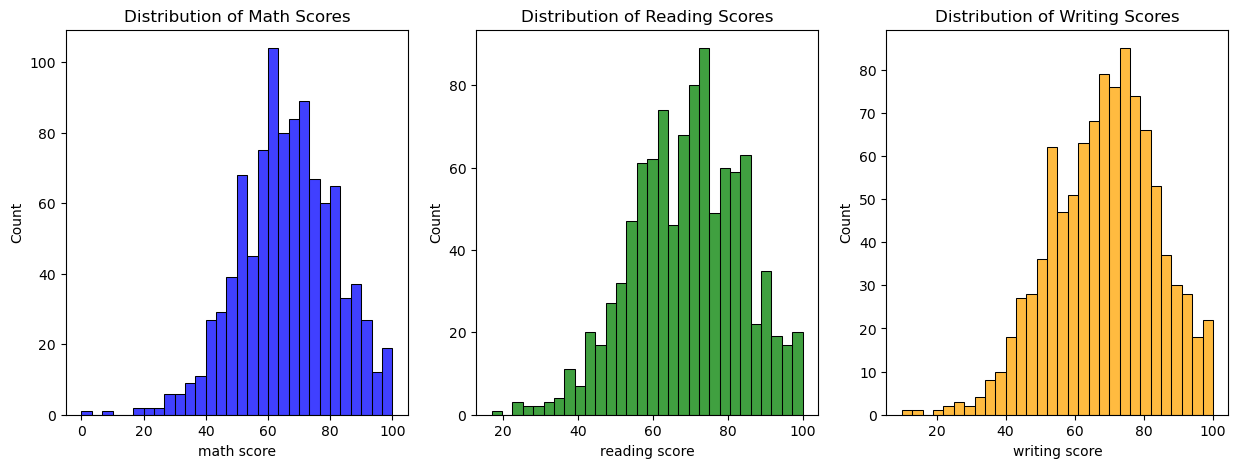

In [354]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=30, color='blue')
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=30, color='green')
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=30, color='orange')
plt.title('Distribution of Writing Scores')
plt.show()

In [355]:
print("Median marks for reading is ",df['reading score'].median())
print("Median marks for maths is ",df['math score'].median())
print("Median marks for writing is ",df['writing score'].median())

Median marks for reading is  70.0
Median marks for maths is  66.0
Median marks for writing is  69.0


Maths marks < Writing marks < Reading marks

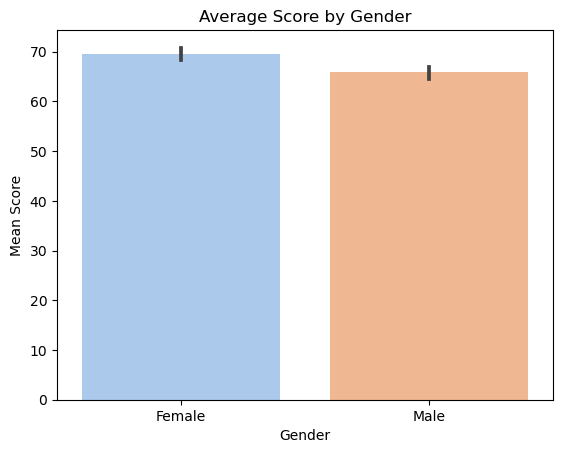

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,518.0,69.569498,14.530099,9.0,61.0,70.0,79.0,100.0
Male,482.0,65.819502,13.711862,23.0,56.0,66.0,76.0,100.0


In [356]:
gender_mapping = {0: 'Female', 1: 'Male'}
df['gender'] = df['gender'].map(gender_mapping)

sns.barplot(x='gender', y='mean_score', data=df, palette="pastel")
plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.show()

# Summary statistics by gender
summary_by_gender = df.groupby('gender')['mean_score'].describe()
summary_by_gender

Female students performed better than the male students

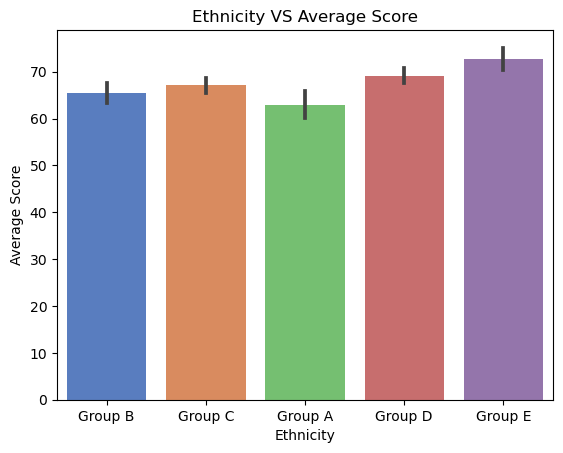

,count,mean,std,min,25%,50%,75%,max
race/ethnicity,,,,,,,,
Group A,89.0,62.955056,14.489738,23.0,52.0,61.0,73.00,96.0
Group B,190.0,65.484211,14.748231,18.0,57.0,65.0,76.75,97.0
Group C,319.0,67.122257,13.863466,9.0,58.0,68.0,77.00,99.0
Group D,262.0,69.179389,13.232459,31.0,60.0,70.0,78.75,99.0
Group E,140.0,72.714286,14.583072,26.0,65.0,73.5,82.25,100.0


In [357]:
race_mapping={0:'Group A',1:'Group B',2:'Group C',3:'Group D',4:'Group E'}
df['race/ethnicity']=df['race/ethnicity'].map(race_mapping)
sns.barplot(x='race/ethnicity', y='mean_score', palette='muted', data=df)
plt.title("Ethnicity VS Average Score")
plt.xlabel("Ethnicity")
plt.ylabel("Average Score")
plt.show()

# Summary statistics by race/ethnicity
summary_by_race = df.groupby("race/ethnicity")['mean_score'].describe()
summary_by_race


Performance By Groups:  Group E > Group D > Group C > Group B > Group A

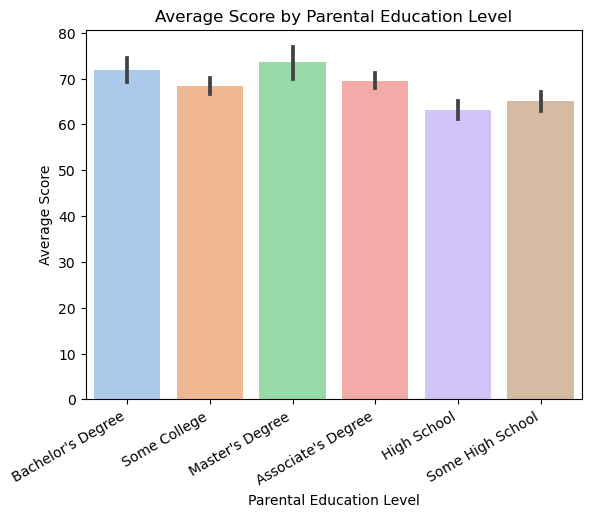

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
Associate's Degree,222.0,69.558559,13.634322,32.0,59.0,70.0,79.0,100.0
Bachelor's Degree,118.0,71.949153,13.994411,39.0,64.0,71.0,81.0,100.0
High School,196.0,63.122449,13.531930,18.0,54.0,65.0,73.0,96.0
Master's Degree,59.0,73.576271,13.594121,45.0,63.0,73.0,85.5,98.0
Some College,226.0,68.446903,13.728456,23.0,60.0,69.0,78.0,99.0
Some High School,179.0,65.072626,14.966265,9.0,55.5,67.0,76.5,99.0


In [320]:
education_mapping ={0: "Associate's Degree",1:"Bachelor's Degree" ,2: 'High School',3: "Master's Degree",4:'Some College' ,5: "Some High School"}
df['parental level of education'] = df['parental level of education'].map(education_mapping)

sns.barplot(x='parental level of education', y='mean_score', data=df,palette="pastel")
plt.title('Average Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

summary_parentalEducation=df.groupby('parental level of education')['mean_score'].describe()
summary_parentalEducation

Performance by Parental Level of Education: Master Degree > Bachelor Degree > Associate Degree > Some College > Some High School > High School

In [321]:
tp={0:'completed',1:'none'}
df['test preparation course']=df['test preparation course'].map(tp)
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

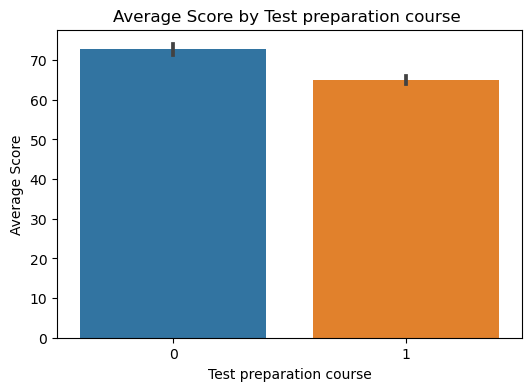

In [336]:
plt.figure(figsize=(6,4))
sns.barplot(x='test preparation course',y='mean_score',data=df)
plt.title('Average Score by Test preparation course ')
plt.xlabel('Test preparation course')
plt.ylabel('Average Score')
plt.show()


Students completed the test preparation course performed well than students did not complete

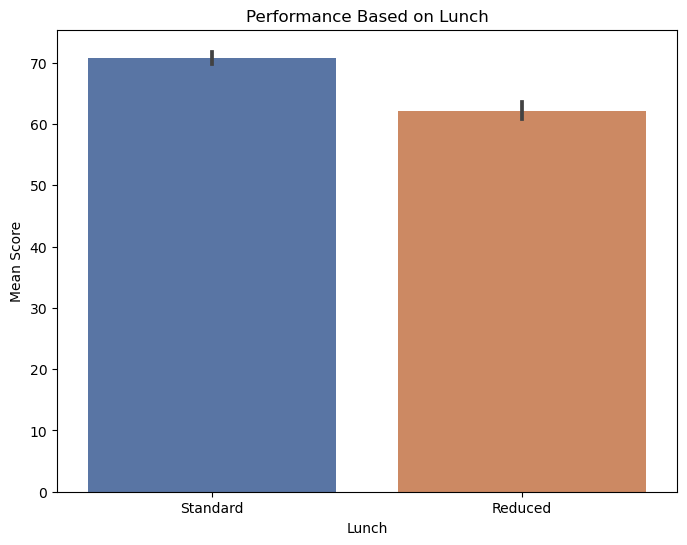

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

l={0:'Reduced',1:'Standard'}
df['lunch']=df['lunch'].map(l)
plt.figure(figsize=(8, 6))
sns.barplot(x='lunch', y='mean_score', data=df, palette='deep')
plt.title("Performance Based on Lunch")
plt.xlabel("Lunch")
plt.ylabel("Mean Score")
plt.show()

In [324]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['test preparation course']=le.fit_transform(df['test preparation course'])
df['gender']=le.fit_transform(df['gender'])
df['lunch']=le.fit_transform(df['lunch'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])


# Correlation between different variables

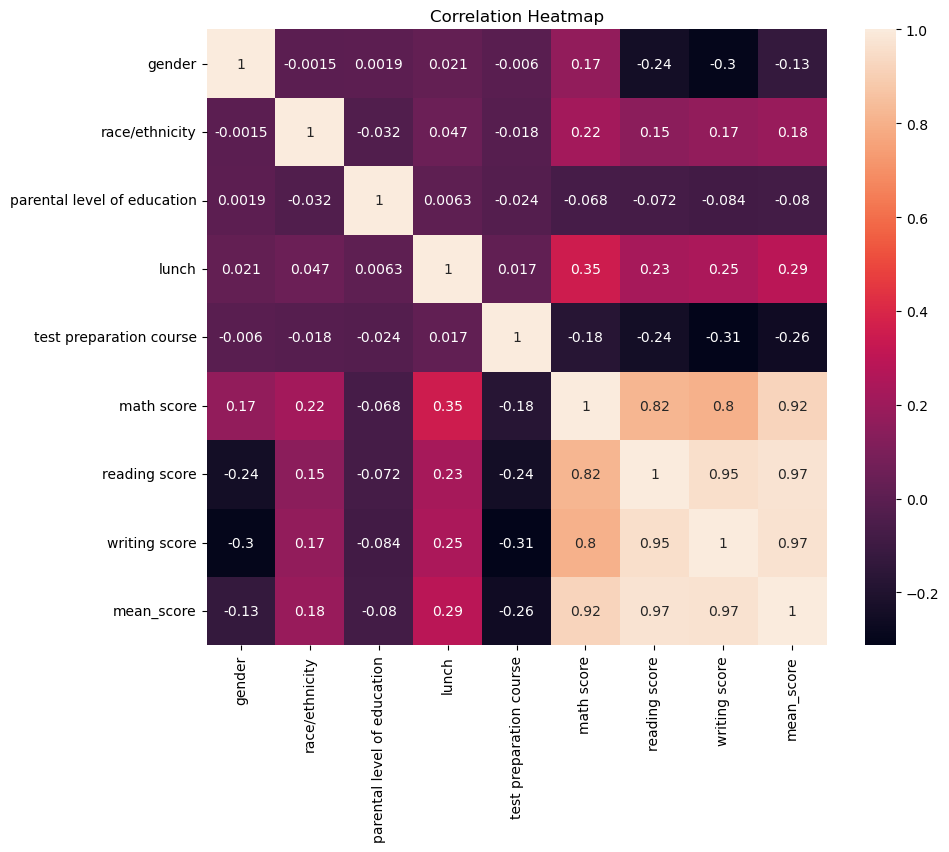

In [326]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

# Model Building : Linear Regression( )

In [333]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

X = df[['test preparation course', 'lunch', 'race/ethnicity', 'parental level of education', 'gender']]
y=df['mean_score']

# Split the data into training and testing sets for each subject
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Train the LinearRegression model for each subject
model_score = LinearRegression()
model_score.fit(X_train, y_train)

y_pred = model_score.predict(X_test)

# Evaluation of the model 
mse_score = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print("Mean Squared Error :", mse_score)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error : 168.15972499423125
Mean Absolute Error (MAE): 10.407375902137549
R-squared (R2): 0.20020929912357666
Root Mean Squared Error (RMSE): 15.28769195095908


In [15]:
import os
os.path.abspath("")

'C:\\Users\\ritti'